In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

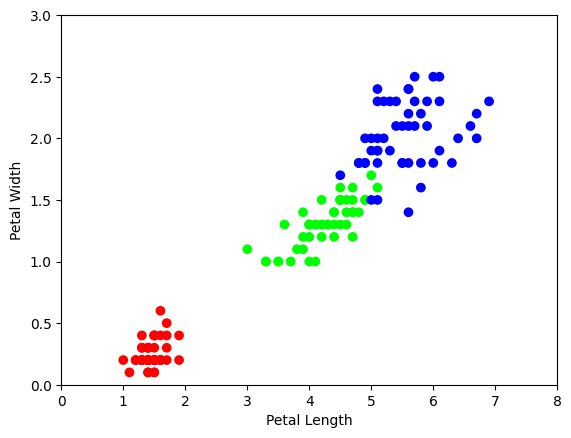

In [3]:
def plot_dataset(X, y, **kwargs):
    COLORS = np.array(["#ff0000", "#00ff00", "#0000ff"])
    petal_length = X[:,0]
    petal_width= X[:,1]
    plt.scatter(petal_length, petal_width, c=COLORS[y])
    plt.xlabel(kwargs.get("xlabel"))
    plt.ylabel(kwargs.get("ylabel"))
    plt.axis(kwargs.get("axis"))
plot_dataset(X, y,
             axis=[0,8,0,3], 
             xlabel="Petal Length", 
             ylabel="Petal Width"
            )
plt.show()

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [5]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [6]:
!dot -Tpng iris_tree.dot -o iris_tree.png

![Alt text](iris_tree.png)

In [7]:
def plot_decision_boundaries(clf, X, y):
    X1_mesh = np.linspace(min(X[:,0]), max(X[:,0]), 1000)
    X2_mesh = np.linspace(min(X[:,1]), max(X[:,1]), 1000)
    X1, X2 = np.meshgrid(X1_mesh, X2_mesh)
    y_pred = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = y_pred.reshape(X1.shape)
    if len(np.unique(y)) == 3:
        colors = ListedColormap(["#ff0000","#00ff00","#0000ff"])
    else:
        colors = ListedColormap(["#ff0000","#00ff00"])
    plt.contourf(X1, X2, Z, alpha=0.3, cmap=colors)

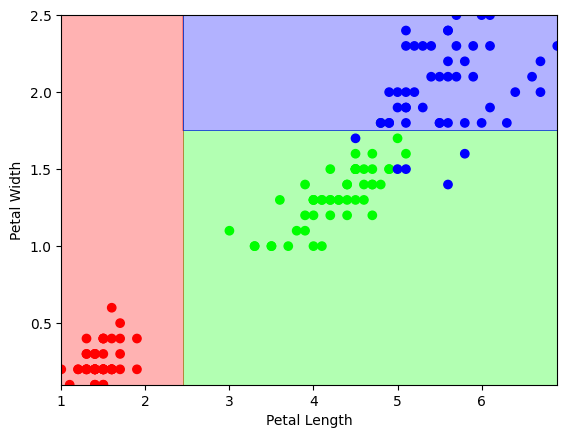

In [8]:
plot_decision_boundaries(tree_clf, X, y)
plot_dataset(X, y,
             xlabel="Petal Length", 
             ylabel="Petal Width"
            )
plt.show()

# Regularization

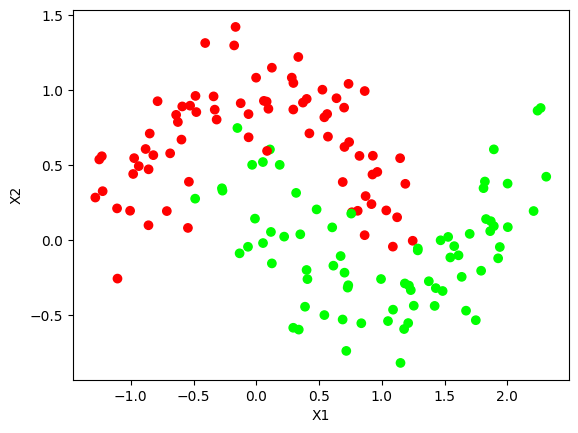

In [9]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=150, noise=0.20, random_state=42)
plot_dataset(X, y, xlabel="X1", ylabel="X2")

In [10]:
tree_clf = DecisionTreeClassifier() # no restrictions
tree_clf.fit(X, y)

DecisionTreeClassifier()

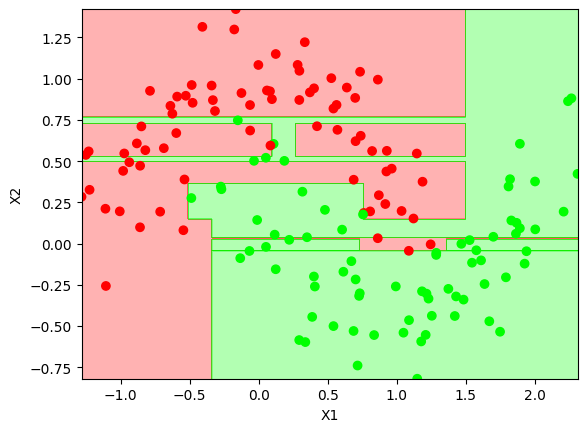

In [11]:
plot_decision_boundaries(tree_clf, X, y)
plot_dataset(X, y, xlabel="X1", ylabel="X2")

In [12]:
tree_clf_reg = DecisionTreeClassifier(min_samples_leaf=5)
tree_clf_reg.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=5)

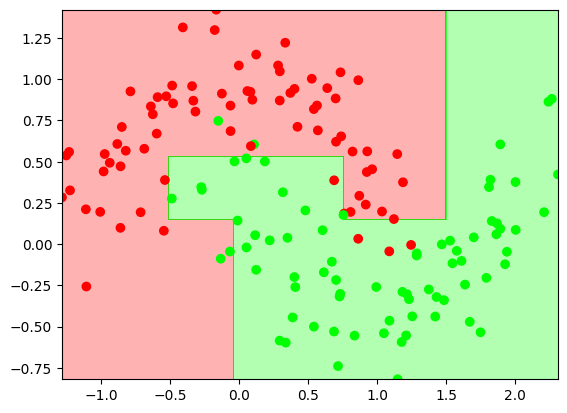

In [13]:
plot_decision_boundaries(tree_clf_reg, X, y)
plot_dataset(X, y, xlabel="X1", ylabel="X2")